In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('F:/NIIT/DS2_/Mini Projects/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data exploration

### Data structure

In [4]:
data.shape

(14204, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
print(f'Item_Outlet_Sales null values: {(1-8523/14204)*100:.1f}%')

Item_Outlet_Sales null values: 40.0%


**OBSERVATION:** 40% of null values observed in Item_Outlet_Sales\
hence the **non-null values will be taken as the new dataset for modelling**

In [7]:
df=data[data['Item_Outlet_Sales'].isnull()==False]
dfnew=data[data['Item_Outlet_Sales'].isnull()==True]

print('Dataset that will further considered for modelling:',df.shape)
display(df.head(3))
print('Dataset that will further considered for testing/as new data:',dfnew.shape)
display(dfnew.head(3))

Dataset that will further considered for modelling: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


Dataset that will further considered for testing/as new data: (5681, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN


### Data summary

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873623,0.070479,140.992782,1997.831867,2181.288914
std,4.645893,0.048761,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data distribution

In [9]:
print('Features'.ljust(30),'dtype'.ljust(10),'n_unique')
print('-'*55)
for i in df.columns:
    print(i.ljust(30),str(df[i].dtype).ljust(10),data[i].nunique())

Features                       dtype      n_unique
-------------------------------------------------------
Item_Identifier                object     1559
Item_Weight                    float64    415
Item_Fat_Content               object     2
Item_Visibility                float64    13010
Item_Type                      object     16
Item_MRP                       float64    8052
Outlet_Identifier              object     10
Outlet_Establishment_Year      int64      9
Outlet_Size                    object     3
Outlet_Location_Type           object     3
Outlet_Type                    object     4
Item_Outlet_Sales              float64    3493


In [10]:
cat,con=[],[]
for i in df.columns:
    if data[i].nunique()<=16:
        cat.append(i)
    else: con.append(i)
        
from tabulate import tabulate
print(tabulate({'Categorical':cat,'Cat_dtype':df[cat].dtypes},headers=['Categorical','Cat_dtype']))
print()
print(tabulate({'Continuous':con,'Con_dtype':df[con].dtypes},headers=['Continuous','Con_dtype']))

Categorical                Cat_dtype
-------------------------  -----------
Item_Fat_Content           object
Item_Type                  object
Outlet_Identifier          object
Outlet_Establishment_Year  int64
Outlet_Size                object
Outlet_Location_Type       object
Outlet_Type                object

Continuous         Con_dtype
-----------------  -----------
Item_Identifier    object
Item_Weight        float64
Item_Visibility    float64
Item_MRP           float64
Item_Outlet_Sales  float64


continuous object is unwanted in the modelling data, hence droping it

In [11]:
df.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
dfnew.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

con.remove('Item_Identifier')
cat.remove('Outlet_Establishment_Year')

### Missing values

In [12]:
anymiss=0
for i in df.columns:
    if df[i].isnull().sum()!=0:
        if df[i].dtype=='object':
            df[i].fillna(df[i].mode(),inplace=True)
        else:
            df[i].fillna(df[i].median(),inplace=True)
        anymiss=1
        
if anymiss==0: print('No missing values')
else: print('Missing values are treated')

No missing values


In [13]:
for i in cat:
    print(i,'-',df[i].nunique(),'-',df[i].size)
    print(df[i].value_counts())
    print('-'*40,'\n')

Item_Fat_Content - 2 - 8523
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
---------------------------------------- 

Item_Type - 16 - 8523
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
---------------------------------------- 

Outlet_Identifier - 10 - 8523
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
---------------------------------------- 

Outlet_Size - 3 - 8523
Small     4

**OBSERVATION:** Data distribution is balanced. All the labels are lucid. No need for any renaming or replacement

# Data visualization

### Categorical data: Count plot

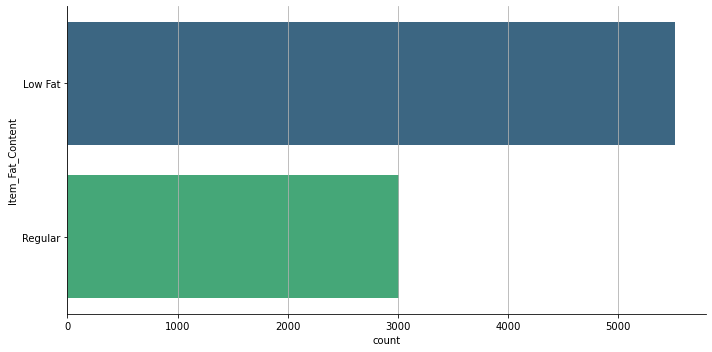

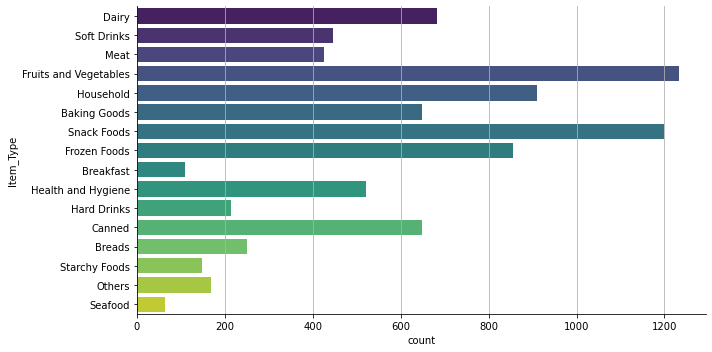

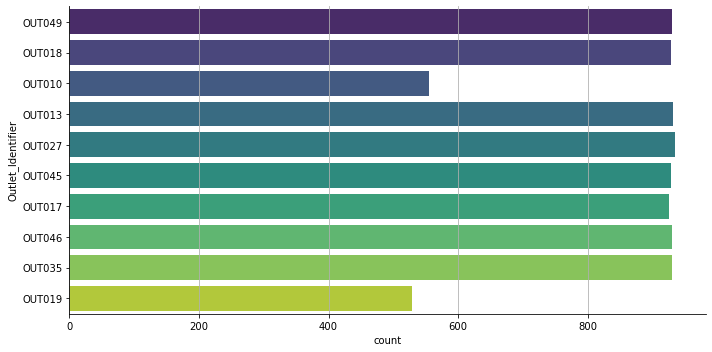

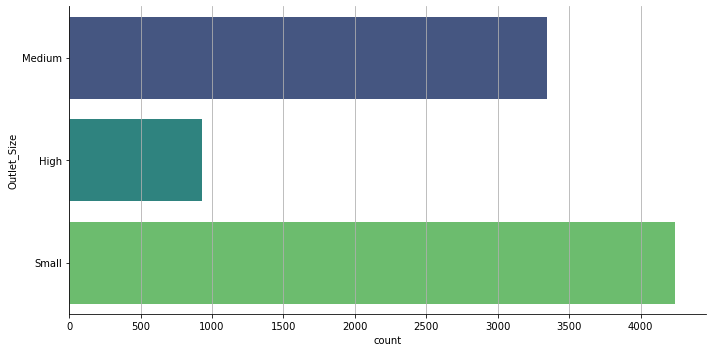

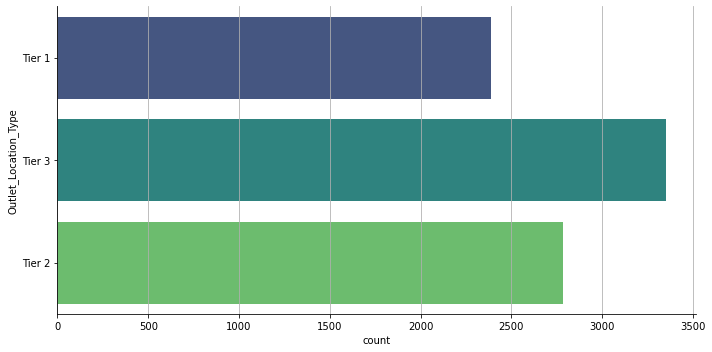

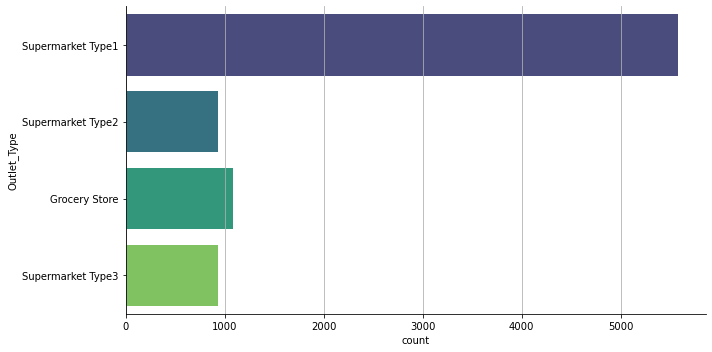

In [14]:
for i in cat:
    sns.catplot(data=df,y=i,kind='count',palette='viridis',height=5,aspect=2)
    plt.grid(axis='x')

**OBSERVATION:**
1. Items containing **Low Fat** are sold more than Regular
2. **Fruits&Vegetables and Snack Foods** are the most sold items maong the Item_Type
3. The sales performance of almost all stores are the same
4. Items if **Small Outlet_Size** are sold most
5. **Tier 3 Outlet_Location_Type** has the highest number of sale
6. **Supermarket Type1** has the highest number of sales

### Continous data: Histogram

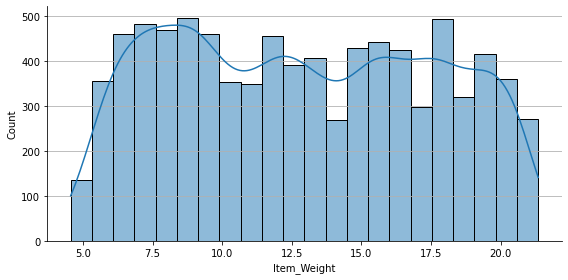

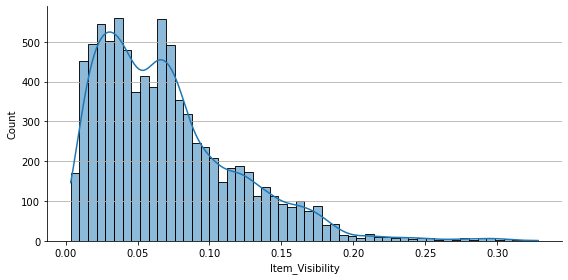

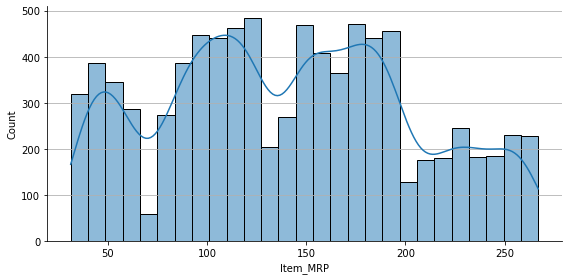

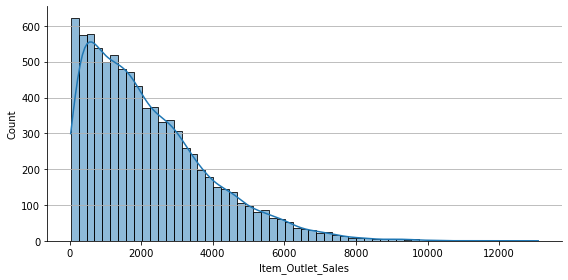

In [15]:
for i in con:
    sns.displot(data=df,x=i,kind='hist',palette='viridis',kde=1,height=4,aspect=2)
    plt.grid(axis='y')

**OBSERVATION:**\
The distribution of Item_Visibility is left-skewed: **items that have less visibility in the store are sold more**\
The distribution of Item_Outlet_SAles is left-skewed: **items that have less sales in the store are sold more**

### Correlation matrix

In [16]:
df.corr().style.background_gradient(cmap='viridis')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.018409,0.026172,0.013261
Item_Visibility,-0.018409,1.000000,-0.005861,-0.135247
Item_MRP,0.026172,-0.005861,1.000000,0.567574
Item_Outlet_Sales,0.013261,-0.135247,0.567574,1.000000


**OBSERVATION**:\
Item_Outlet_Sales is positively correlated with Item_MRP

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(6)
memory usage: 990.5+ KB


# Data Preprocessing

### Feature engineering

In [18]:
from sklearn import preprocessing

In [19]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=preprocessing.LabelEncoder().fit_transform(df[i])

### Feature scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.0,1.0,0.333333,0.073651


# Data splitting

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
y=df['Item_Outlet_Sales']
x=df.drop('Item_Outlet_Sales',axis=1)
print('x:',x.shape)
print('y:',y.shape)

x: (8523, 9)
y: (8523,)


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)
print('train:',x_train.shape,x_test.shape)
print('test:',y_train.shape,y_test.shape)

train: (6818, 9) (1705, 9)
test: (6818,) (1705,)


# Modelling

models that can undergo hyperparameter tuning are choosen to tune and get the best model:\
**Ridge, DecisionTreeRegressor, RandomForestRegressor(Bagging), RandomForestRegressor(AdaBoost),Stacking**

In [25]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

### LinearRegression

because we have more than 1 explanatory variable: Multiple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression, Ridge

In [27]:
# training 
lr=LinearRegression()
lr.fit(x_train,y_train)
print('LinearReggression: Training accuracy:',lr.score(x_train,y_train))

LinearReggression: Training accuracy: 0.5024282771525101


In [28]:
# model properties
print('Intercept:',lr.intercept_)
print('Slope:',lr.coef_)

Intercept: -0.04682437773656417
Slope: [ 2.37992974e-03  4.32898654e-03 -4.40110836e-02 -7.05360819e-05
  2.81945170e-01  3.80278753e-02 -8.21323865e-03 -1.33446986e-02
  1.98490713e-01]


In [29]:
# testing
y_lr=lr.predict(x_test)
print('LinearReggression: Accuracy of test:',r2_score(y_test,y_lr))

LinearReggression: Accuracy of test: 0.5006527157358899


Text(0, 0.5, 'y_predicted')

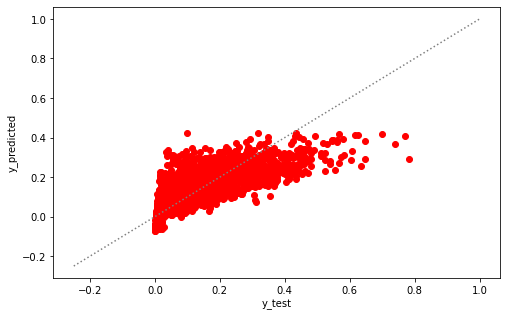

In [92]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_lr,c='r')
plt.plot([-0.25,1],[-0.25,1],':',c='gray')
plt.xlabel('y_test')
plt.ylabel('y_predicted')

the accuracy of model on the training data and testing data don't have huge difference\
but this accuracy of the model on a whole is not good

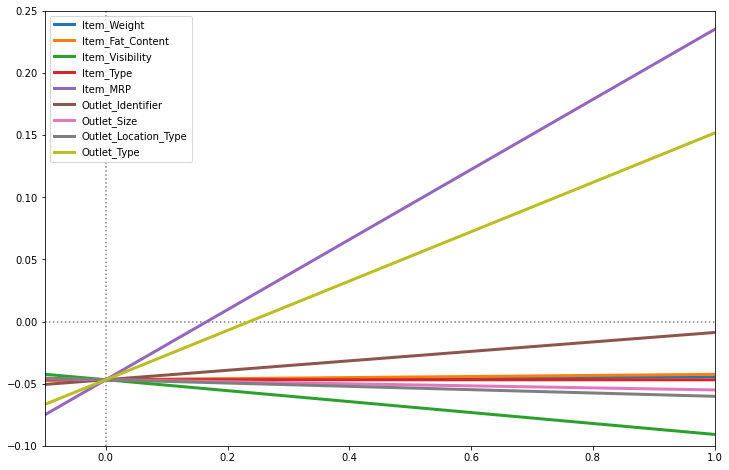

In [77]:
xax=np.linspace(-1,1,100)
plt.figure(figsize=(12,8))
plt.xlim(-0.1,1)
plt.ylim(-0.1,0.25)
plt.axhline(y=0,linestyle=':',c='gray')
plt.axvline(x=0,linestyle=':',c='gray')
for m,c in zip(lr.coef_,x_train.columns):
    yax=m*xax+lr.intercept_
    plt.plot(xax,yax,linewidth=3,label=c)
plt.legend(loc=2)

### Ridge

getting the best alpha for Ridge

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
error=dict()
for alp in range(1,5):
    scores = cross_val_score(Ridge(alpha=i), x_train, y_train, scoring = 'neg_mean_squared_error', cv= 5)
    error[alp]=np.sqrt(-scores.mean())
print('Optimum alpha for Ridge model:',min(error,key=lambda i:error[i]))

Optimum alpha for Ridge model: 1


In [33]:
# training
r=Ridge(alpha=1)
r.fit(x_train,y_train)
print('Ridge: Training accuracy:',r.score(x_train,y_train))

Ridge: Training accuracy: 0.5024252899760621


In [34]:
# model properties
print('Intercept:',r.intercept_)
print('Slope:',r.coef_)

Intercept: -0.04695796974815039
Slope: [ 2.39272345e-03  4.33165873e-03 -4.38417397e-02 -3.65338037e-05
  2.81346212e-01  3.86481518e-02 -8.16588898e-03 -1.26741851e-02
  1.97551292e-01]


In [35]:
# testing
y_r=r.predict(x_test)
print('Ridge: Accuracy of test:',r2_score(y_test,y_r))

Ridge: Accuracy of test: 0.5006825390100844


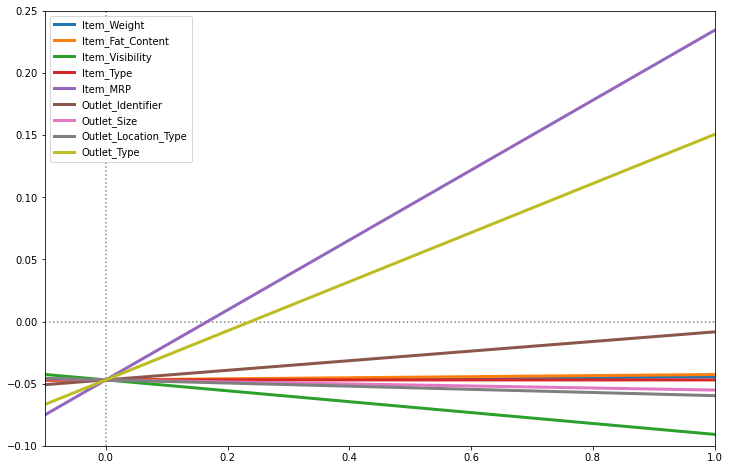

In [76]:
xax=np.linspace(-1,1,100)
plt.figure(figsize=(12,8))
plt.xlim(-0.1,1)
plt.ylim(-0.1,0.25)
plt.axhline(y=0,linestyle=':',c='gray')
plt.axvline(x=0,linestyle=':',c='gray')
for m,c in zip(r.coef_,x_train.columns):
    yax=m*xax+r.intercept_
    plt.plot(xax,yax,linewidth=3,label=c)
plt.legend(loc=2)

In [36]:
imp_r=pd.DataFrame({'Coefficient':r.coef_,'Feature':x_train.columns})
display(imp_r.sort_values(by='Coefficient',ascending=False)[:3])

,Coefficient,Feature
4,0.281346,Item_MRP
8,0.197551,Outlet_Type
5,0.038648,Outlet_Identifier


LinearRegression and Ridge returns the same accuracy\
Features that most influence accoring to Ridge model:\
**1.Item_MRP\
2.Outlet_Type\
3.Outlet_Identifier**

### DecisionTreeRegressor

getting the best max_depth for DecisionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':list(range(2,len(df.columns)))}
grid_scearch_r=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,scoring='r2')

grid_scearch_r.fit(x_train,y_train)

print(grid_scearch_r.best_estimator_)
print('DecisionTreeRegressor: Training accuracy:',grid_scearch_r.score(x_train,y_train))

DecisionTreeRegressor(max_depth=5)
DecisionTreeRegressor: Training accuracy: 0.6054958077408528


In [40]:
# testing 
y_dtr=grid_scearch_r.predict(x_test)
print('DecisionTreeRegressor: Accuracy on test:',grid_scearch_r.score(x_test,y_test))

DecisionTreeRegressor: Accuracy on test: 0.5914810571346263


Text(0, 0.5, 'y_predicted')

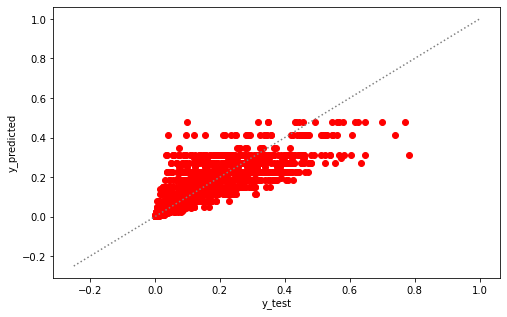

In [93]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_dtr,c='r')
plt.plot([-0.25,1],[-0.25,1],':',c='gray')
plt.xlabel('y_test')
plt.ylabel('y_predicted')

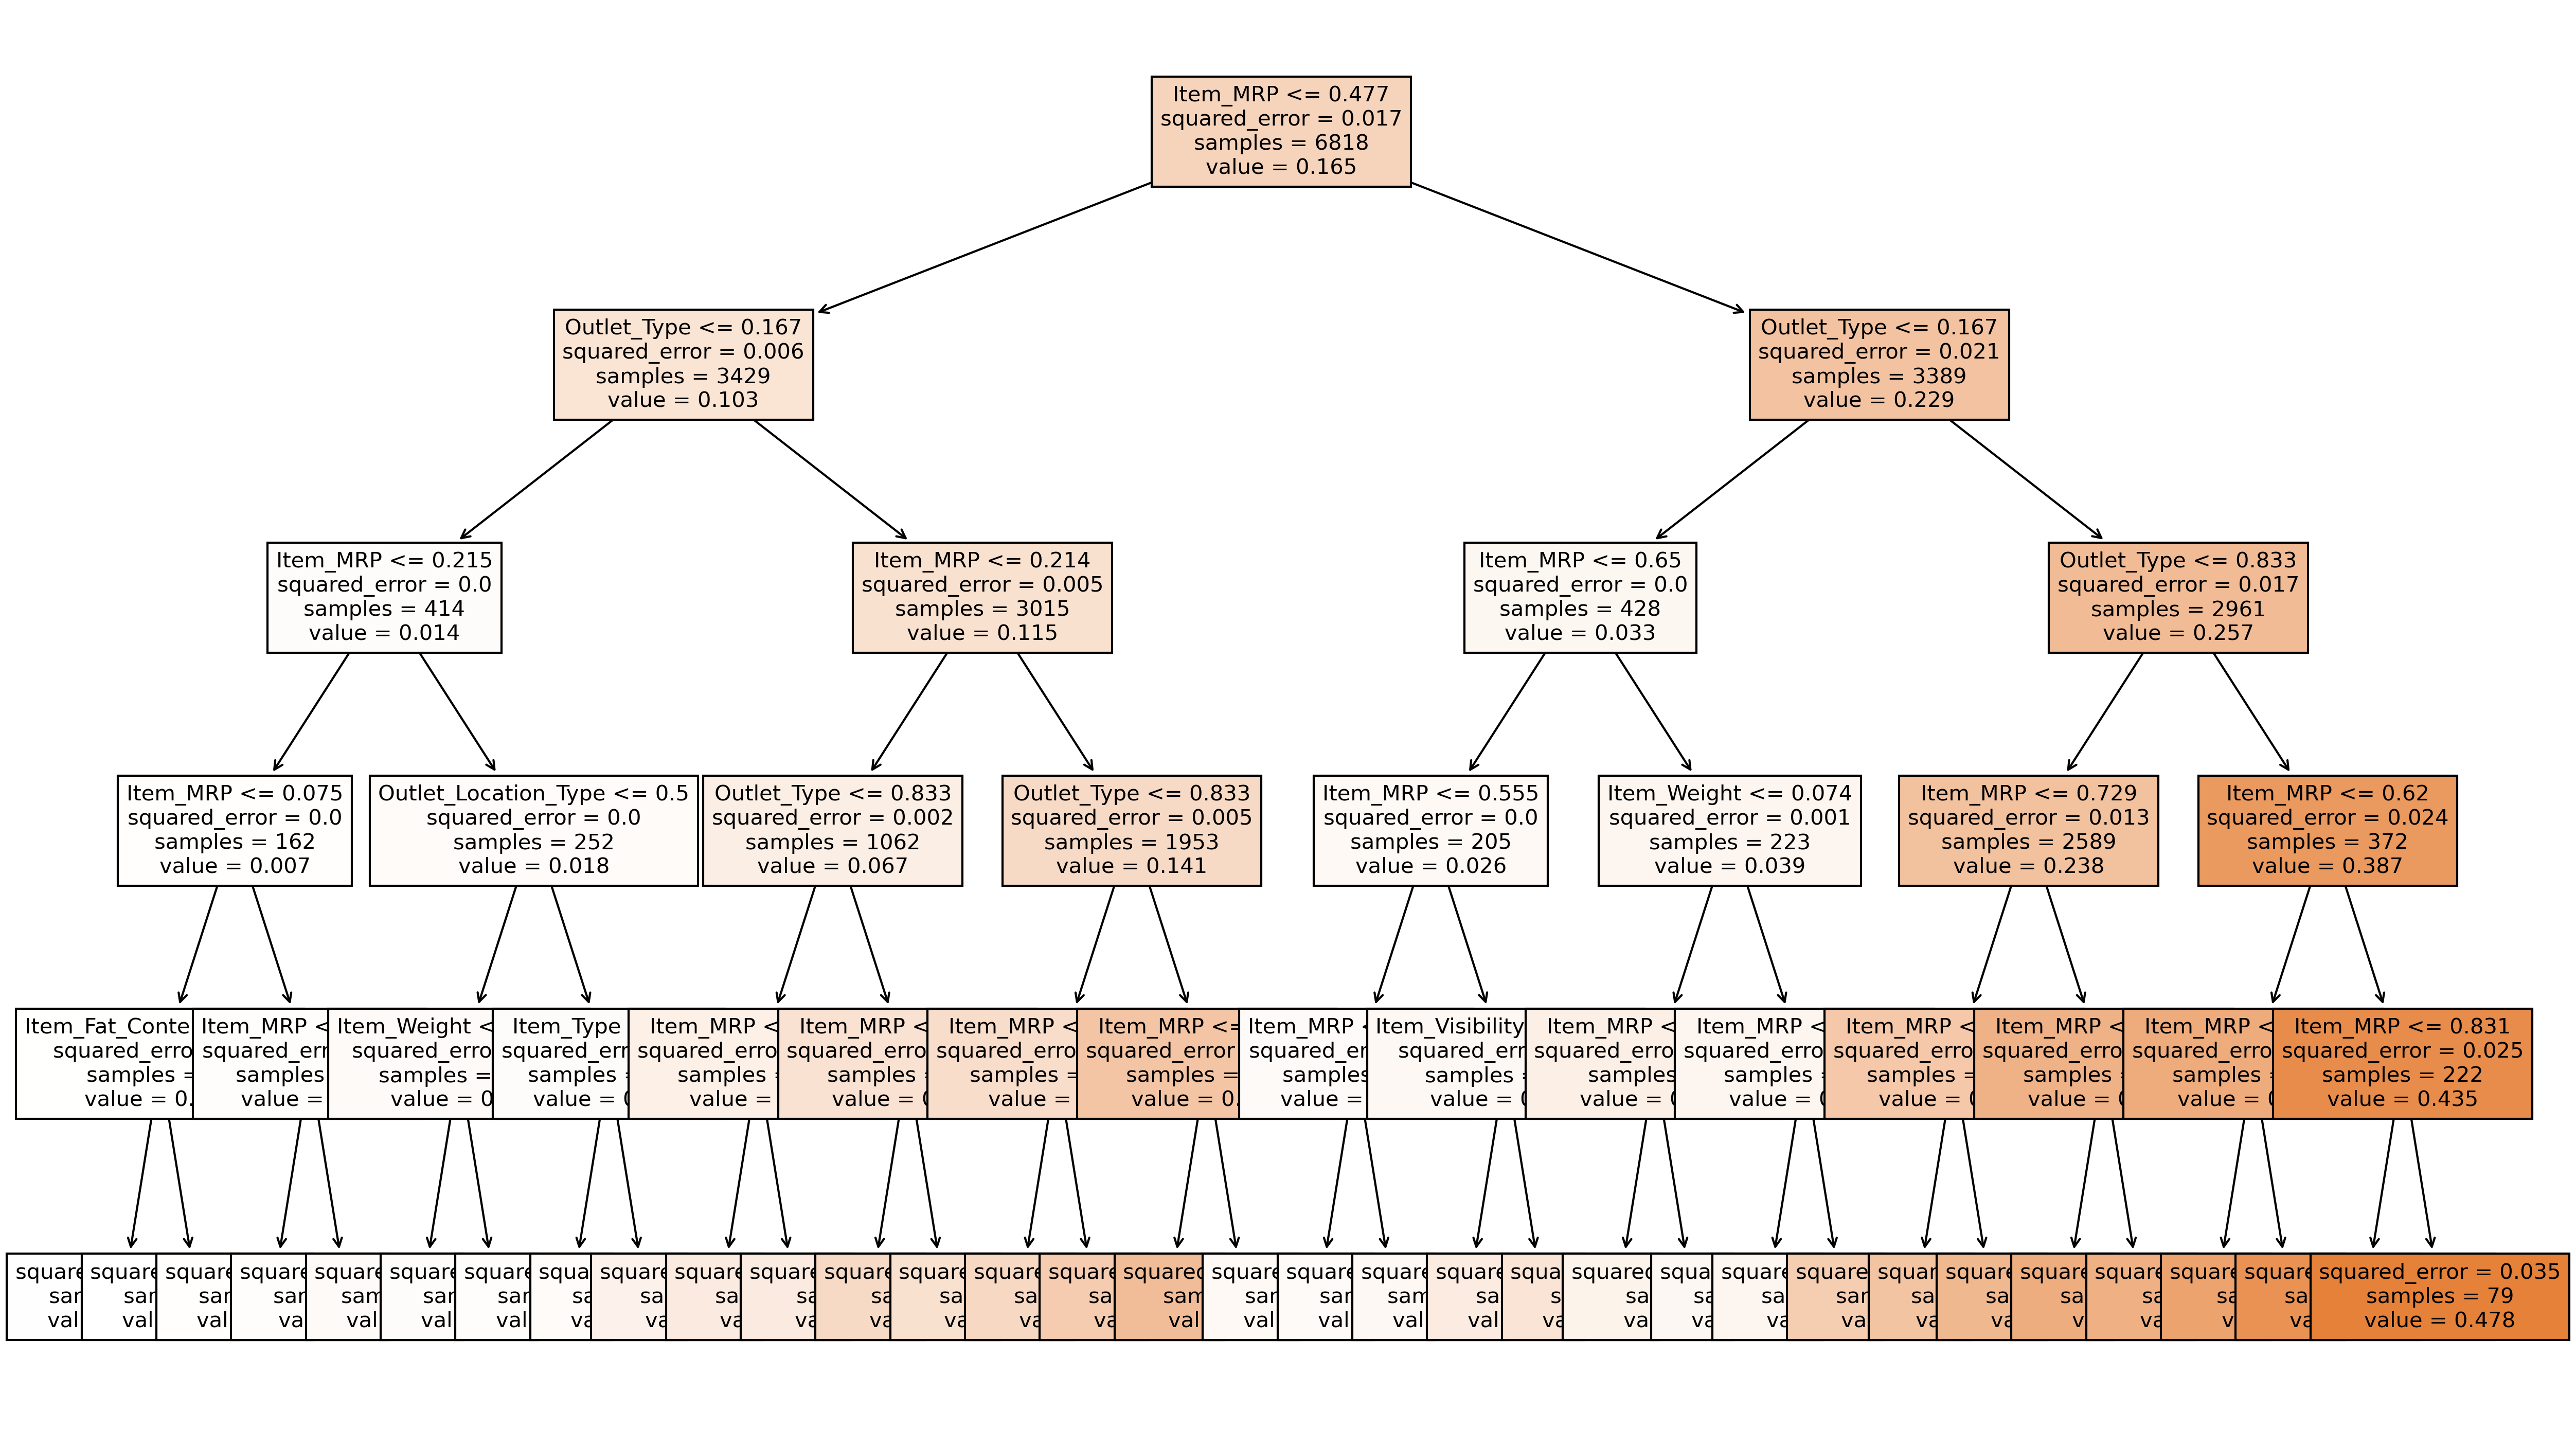

In [42]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12),dpi=300)
tree.plot_tree(DecisionTreeRegressor(max_depth=5).fit(x_train,y_train),fontsize=10,feature_names=x_train.columns,filled=True);

In [41]:
from sklearn.inspection import permutation_importance
imp_dtr=permutation_importance(grid_scearch_r,x_test,y_dtr)
imp_dtr=pd.DataFrame({'Importance':imp_dtr.importances_mean,'Feature':x_train.columns})
display(imp_dtr.sort_values(by='Importance',ascending=False)[:3])

,Importance,Feature
4,1.197105,Item_MRP
8,0.932076,Outlet_Type
7,0.000096,Outlet_Location_Type


Training and tesing accuracies are almost the same\
Features that most influence accoring to DecisionTreeRegressor model:\
**1.Item_MRP\
2.Outlet_Type\
3.Outlet_Identifier**

### RandomForestRegressor(Bagging)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
params={'max_depth':list(range(2,len(df.columns))),'n_estimators':list(range(5,11))}

grid_scearch_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,scoring='r2')
grid_scearch_rf.fit(x_train,y_train)

print(grid_scearch_rf.best_estimator_)
print('RandomForestRegressor: Training accuracy:',grid_scearch_rf.score(x_train,y_train))

RandomForestRegressor(max_depth=6, n_estimators=6)
RandomForestRegressor: Training accuracy: 0.6240975098700287


In [45]:
# testing 
y_rf=grid_scearch_rf.predict(x_test)
print('RandomForestRegressor: Accuracy on test:',grid_scearch_rf.score(x_test,y_test))

RandomForestRegressor: Accuracy on test: 0.5901504165171354


Text(0, 0.5, 'y_predicted')

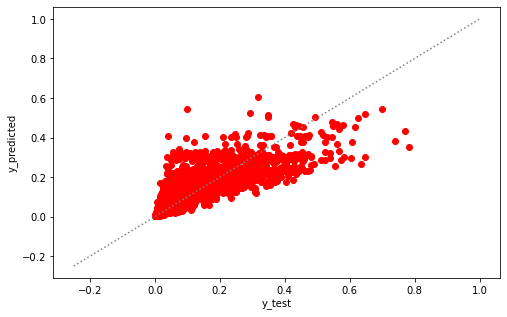

In [94]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_rf,c='r')
plt.plot([-0.25,1],[-0.25,1],':',c='gray')
plt.xlabel('y_test')
plt.ylabel('y_predicted')

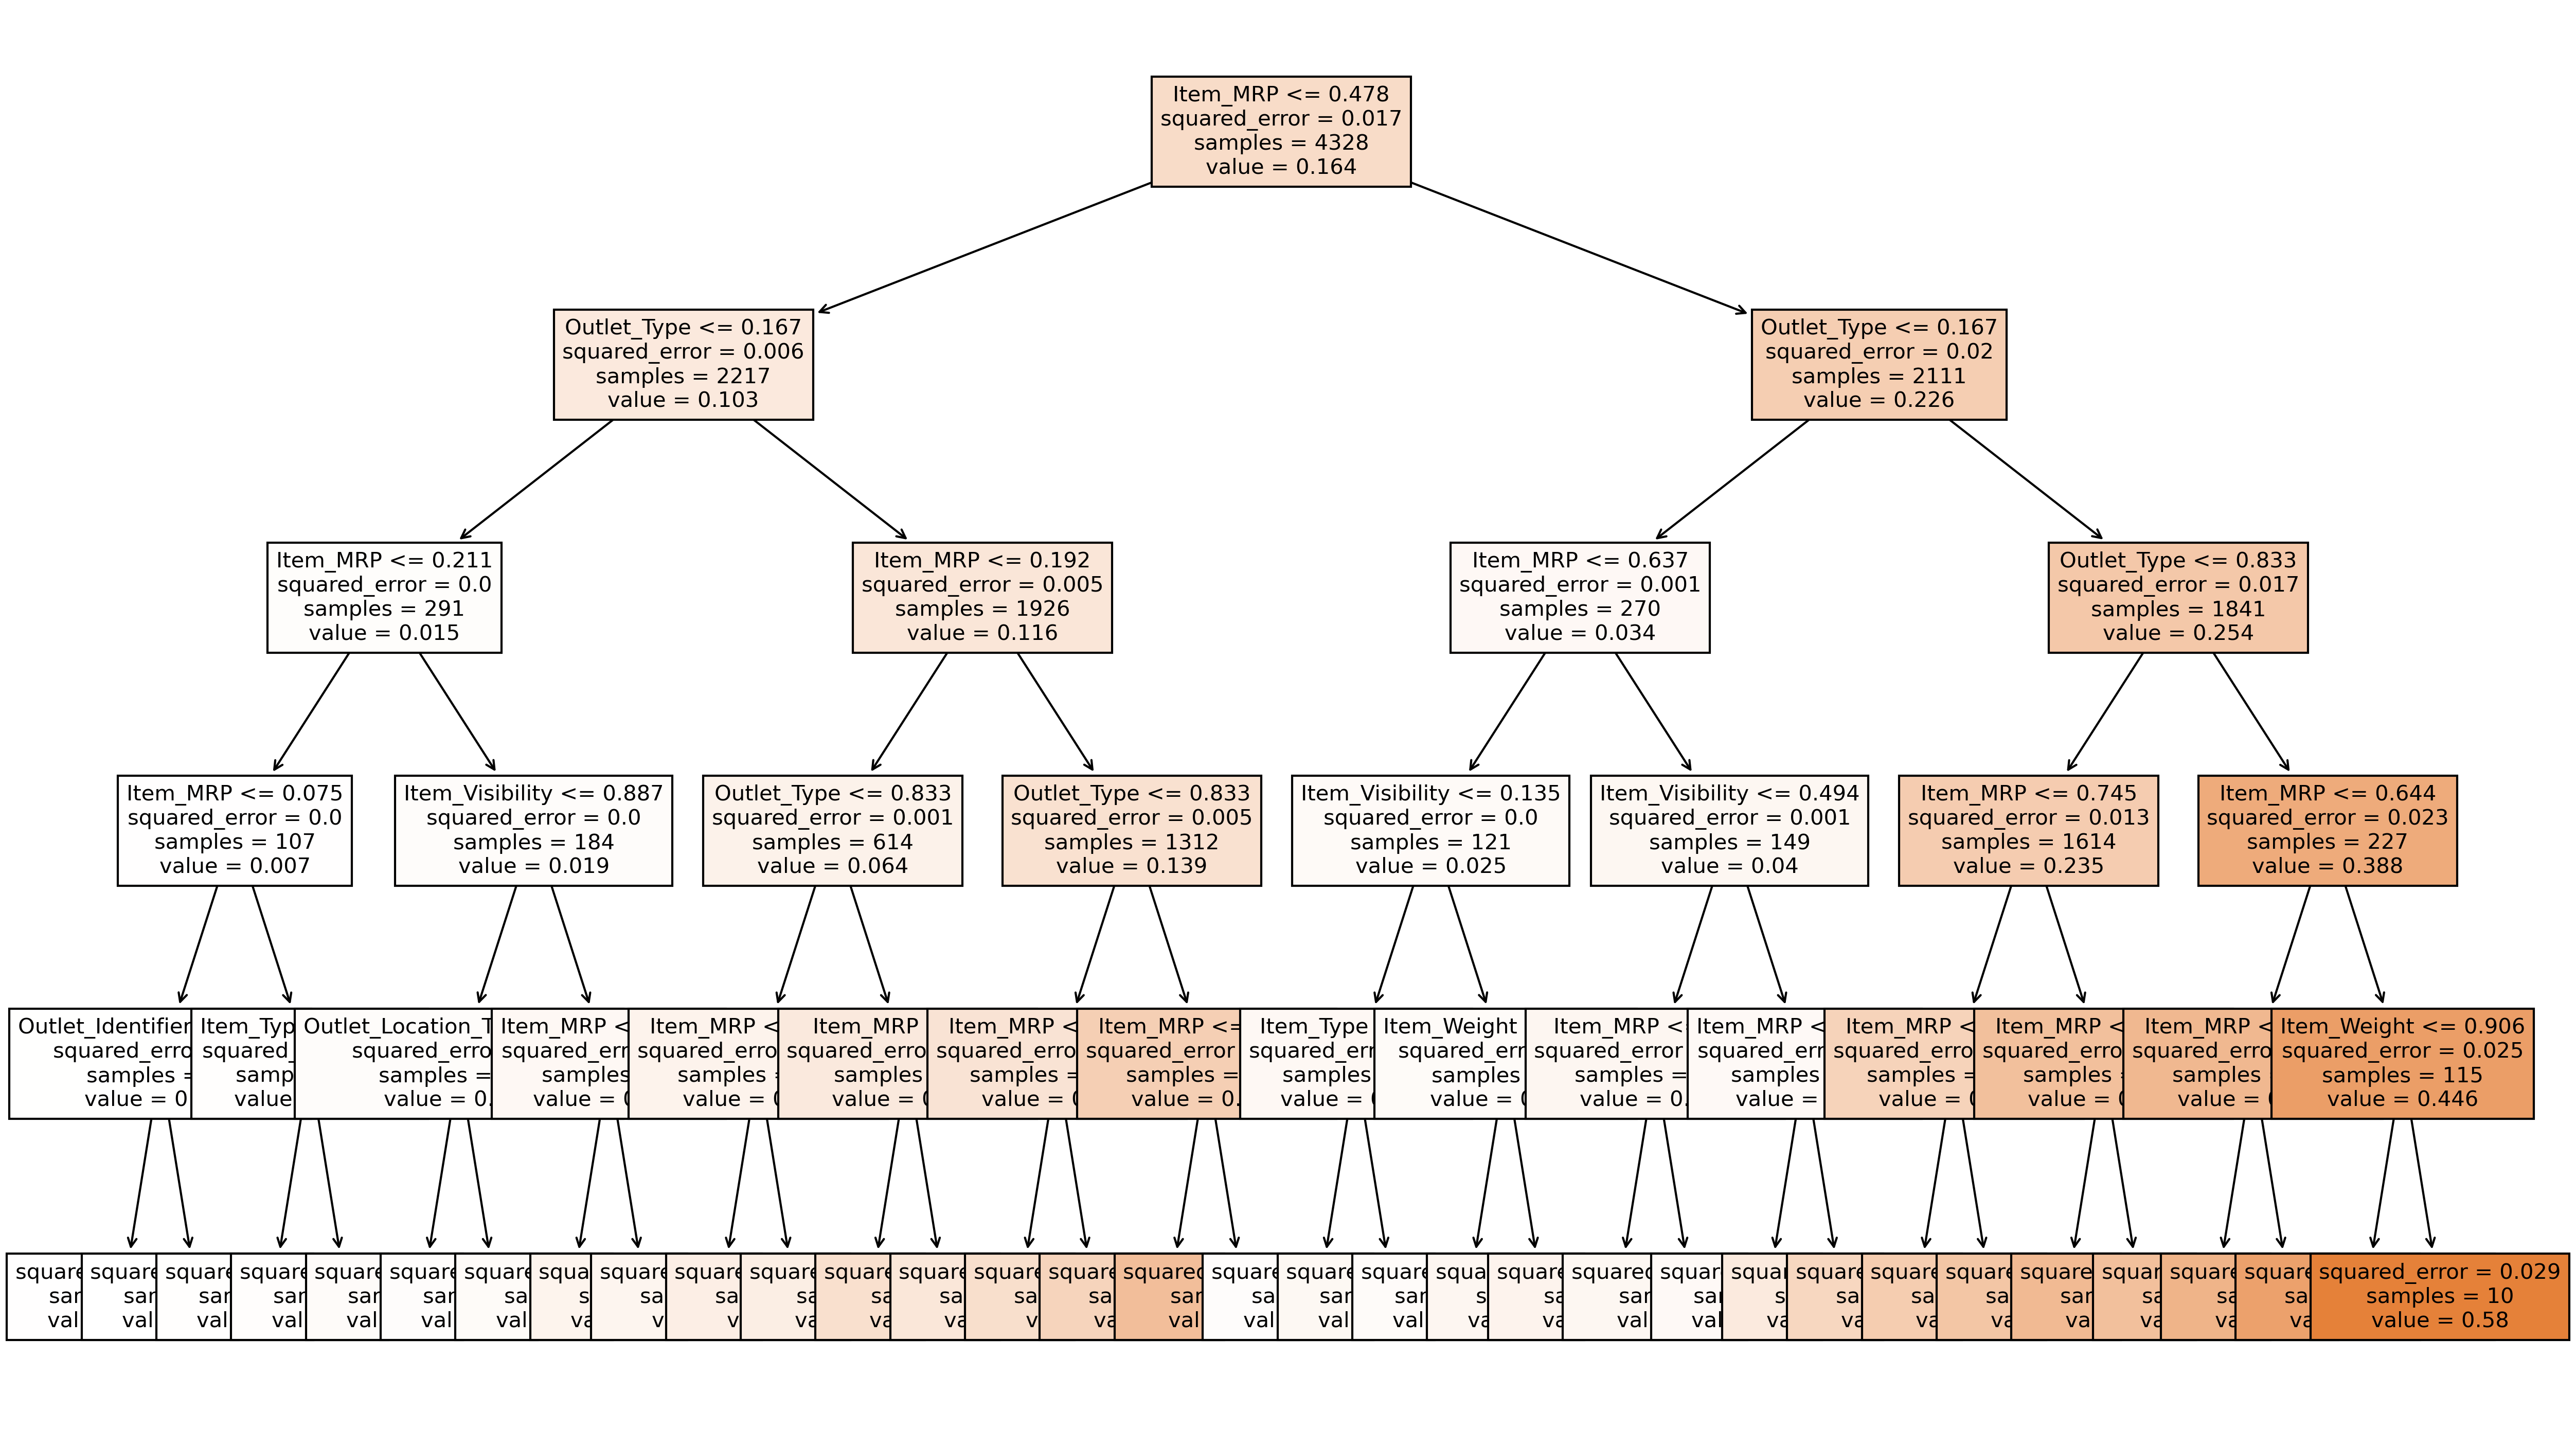

In [47]:
plt.figure(figsize=(20,12),dpi=300)
tree.plot_tree(RandomForestRegressor(max_depth=5,n_estimators=10).fit(x_train,y_train).estimators_[0],
               fontsize=10,filled=True,feature_names=x_train.columns);

In [46]:
imp_rf=permutation_importance(grid_scearch_rf,x_test,y_rf)
imp_rf=pd.DataFrame({'Importance':imp_rf.importances_mean,'Feature':x_train.columns})
display(imp_rf.sort_values(by='Importance',ascending=False)[:3])

,Importance,Feature
4,1.213076,Item_MRP
8,0.912240,Outlet_Type
0,0.004408,Item_Weight


Training and tesing accuracies are almost the same\
Features that most influence accoring to RandomForestRegressor ensemble:\
**1.Item_MRP\
2.Outlet_Type\
3.Item_Weight**

### Boosting

In [48]:
from sklearn.ensemble import AdaBoostRegressor

In [49]:
ab=AdaBoostRegressor(n_estimators=10,random_state=1)
ab.fit(x_train,y_train)
print('AdaBoostRegressor: Training accuracy:',ab.score(x_train,y_train))

AdaBoostRegressor: Training accuracy: 0.5497859439885349


In [50]:
y_ab=ab.predict(x_test)
print('AdaBoostRegressor: Accuracy on test:',ab.score(x_test,y_test))

AdaBoostRegressor: Accuracy on test: 0.5453949871029704


In [51]:
imp_ad=permutation_importance(ab,x_test,y_ab)
imp_ad=pd.DataFrame({'Feature':x_train.columns,'Importance':imp_ad.importances_mean})
display(imp_ad.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
4,Item_MRP,1.423799
8,Outlet_Type,0.883443
3,Item_Type,0.003266


Training and tesing accuracies are almost the same\
Features that most influence accoring to AdaBoostRegressor ensemble:\
**1.Item_MRP\
2.Outlet_Type\
3.Item_type**

### Stacking

In [52]:
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [53]:
level0=[('svm', SVR()),('cart',DecisionTreeRegressor()),('knn',KNeighborsRegressor())] 
level1=LinearRegression()

sr=StackingRegressor(estimators=level0,final_estimator=level1,cv=5).fit(x_train,y_train)
print('StackingRegressor: Training accuracy:',sr.score(x_train,y_train))

StackingRegressor: Training accuracy: 0.696041376225943


In [54]:
y_sr=sr.predict(x_test)
print('StackingRegressor: Accuracy on test:',sr.score(x_test,y_test))

StackingRegressor: Accuracy on test: 0.5879017049276551


Text(0, 0.5, 'y_predicted')

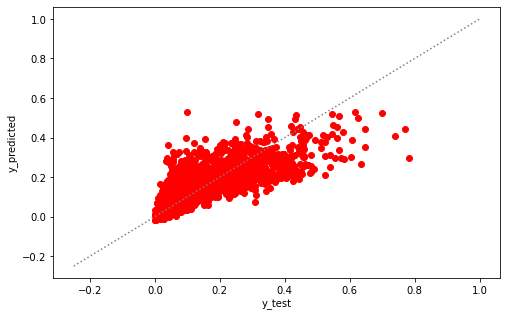

In [95]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_sr,c='r')
plt.plot([-0.25,1],[-0.25,1],':',c='gray')
plt.xlabel('y_test')
plt.ylabel('y_predicted')

In [55]:
imp_sr=permutation_importance(sr,x_test,y_sr)
imp_sr=pd.DataFrame({'Feature':x_train.columns,'Importance':imp_sr.importances_mean})
display(imp_sr.sort_values(by='Importance',ascending=False)[:3])

,Feature,Importance
4,Item_MRP,1.136425
8,Outlet_Type,0.811861
7,Outlet_Location_Type,0.180923


Training and tesing accuracies are almost the same\
Features that most influence accoring to StackingRegressor ensemble:\
**1.Item_MRP\
2.Outlet_Type\
3.Outlet_Location_Type**

# Conclsuion

In [79]:
print('Training accuracies:')
print('-'*50)
print('LinearRegression'.ljust(25),round(lr.score(x_train,y_train),3))
print('Ridge'.ljust(25),round(r.score(x_train,y_train),3))
print('DecisionTreeRegressor'.ljust(25),round(grid_scearch_r.score(x_train,y_train),3))
print('RandomForestRegressor'.ljust(25),round(grid_scearch_rf.score(x_train,y_train),3))
print('AdaBoostRegressor'.ljust(25),round(ab.score(x_train,y_train),3))
print('StackingRegressor'.ljust(25),round(sr.score(x_train,y_train),3))

Training accuracies:
--------------------------------------------------
LinearRegression          0.502
Ridge                     0.502
DecisionTreeRegressor     0.605
RandomForestRegressor     0.624
AdaBoostRegressor         0.55
StackingRegressor         0.696


**StackingRegressor** shows the best result with accuracy of 69.6%\
**Item_MRP and Outlet_Type** are the top 2 influential variables on the prediction of the sales